In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Discrete Fourier Transform
def DFT2D(f):
    #create a complex array of complex coeeficients
    F = np.zeros(f.shape, dtype=np.complex64)
    
    # get the size of the image to know the limits
    n,m = f.shape[0:2] 
    
    # consider "y" as a vector to simplify the operations
    y = np.arange(m)
    
    # calculate the DFT for each frequency "u,v"
    for u in np.arange(n):
        for v in np.arange(m):
            # considering each image pixel
            for x in np.arange(n):
                F[u,v] += np.sum( f[x]*np.exp( (-1j*2*np.pi)*((u*x/n)+(v*y/m)) ) )
    return F/np.sqrt(n*m)
    #return F 

# Inverse Discrete Fourier Transform
def invDFT2D(F):
    #create a complex array of complex coeeficients
    f = np.zeros(F.shape, dtype=np.complex64)
    n,m = F.shape[0:2]
    
    # consider "v" as a vector to simplify the operations
    v = np.arange(m)
    # calculate the Inverse DFT for  for each pixel "x,y"
    for x in np.arange(n):
        for y in np.arange(m):
            # considering each frequency
            for u in np.arange(n):
                f[x,y] += np.sum( F[u]*np.exp( (1j*2*np.pi)*( ((u*x)/n)+((v*y/m)) ) ) )
    return f/np.sqrt(n*m)
    #return f/(n*m)


# Example: case 1 (run.codes)

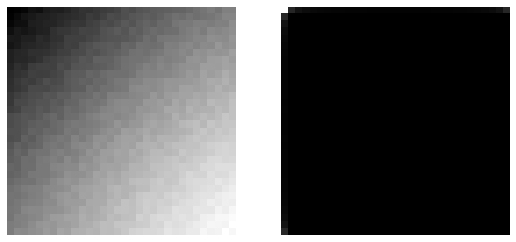

In [15]:
# loading image
img1 = imageio.imread("gradient_noise_small.png")

# getting the extreme intensity values of the orignal image
minOriginal = np.amin(img1)
maxOriginal = np.amax(img1)

# apply the Discrete Fourier Transform:
F1s = DFT2D(img1)

# visualize the image processing
plt.figure(figsize=(9,9))
plt.subplot(121)
plt.imshow(img1, cmap="gray") # original image
plt.axis('off')
plt.subplot(122)
plt.imshow(np.abs(F1s), cmap="gray") # image in the frequency domain
plt.axis('off')

# threshold
T = 0.05
# variable to store the number of coefficient that will be zero after the filtering
count = 0

# to get the SECOND peak, it is necessary to avoid the coefficient zero
# which is known to be F(0,0)
absF = np.abs(F1s) # to filter in |F|
absF[0,0] = 0

# F1s_wf will be the filtered image, it starts as the transformed image
F1s_wf = F1s 
#F1s_wf[0,0] = 0+0j

# to get the SECOND peak:
maxF = np.amax(absF)

# get the limits of the image to filter
nF,mF = F1s_wf.shape

# consider the threshold
th = maxF*T
# apply the condition of threshold to set to zero some coefficients
for i in range(nF):
    for j in range(mF):
        if absF[i,j] < th:
            #absF[i,j] = 0
            F1s_wf[i,j] = 0+0j
            count = count +1 # get the number of coefficients below the threshold

Image after applying Inverse DFT
[[-114.95899    -109.86524    -105.92776    ...  -14.271482
   -12.427731    -10.208981  ]
 [-110.17775    -105.08399    -101.14649    ...   -9.490223
    -7.646473     -5.427725  ]
 [-106.177734   -101.08398     -97.14648    ...   -5.4902234
    -3.6464734    -1.4277234 ]
 ...
 [ -14.208994     -9.115238     -5.1777325  ...   86.47851
    88.32226      90.541016  ]
 [ -12.177735     -7.083984     -3.1464822  ...   88.50976
    90.35351      92.57226   ]
 [  -9.490228     -4.3964763    -0.45897728 ...   91.19727
    93.04102      95.25977   ]]


(-0.5, 31.5, 31.5, -0.5)

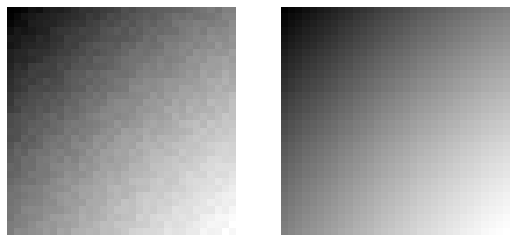

In [16]:
# CALCULATE THE INVERSE DFT OF THE FILTERED IMAGE
f_inv = invDFT2D(F1s_wf)
f_invF = f_inv.real

print("Image after applying Inverse DFT")
print(f_invF)

# visualize the image processing
plt.figure(figsize=(9,9))
plt.subplot(121)
plt.imshow(img1, cmap="gray") # Original Image
plt.axis('off')
plt.subplot(122)
plt.imshow(f_invF, cmap="gray") # FIltered Image (after applying inverse DFT)
plt.axis('off')

#### Observation: in the previous result (inverse DFT), there are negative values of intensities in the NEW IMAGE. How do I deal with them in order to get the NEW MEAN ?

In [17]:
# present the results as it is required in run.codes:            
print("Threshold: %.4f" % th)            
print("Filtered Coeficients: ",count-1) 
print("Original Mean: %.2f" % img1.mean())
print("New Mean: %.2f" % f_invF.mean())

Threshold: 28.3364
Filtered Coeficients:  961
Original Mean: 116.06
New Mean: -0.00


#### Observation: in the previous result, the New Mean gets ZERO...

### Proposed Solution: Scaled the new image (inverse DFT) according to the max & min of the original image

New Mean: 117.03


(-0.5, 31.5, 31.5, -0.5)

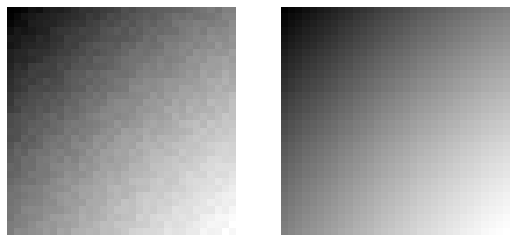

In [18]:
# scaling the filtered image
minImg = np.min(f_invF)
maxImg = np.max(f_invF)
imgScaled = ((f_invF-minImg)*maxOriginal/(maxImg-minImg))
print("New Mean: %.2f" % imgScaled.mean())

# visualize the image processing
plt.figure(figsize=(9,9))
plt.subplot(121)
plt.imshow(img1, cmap="gray") # Original Image
plt.axis('off')
plt.subplot(122)
plt.imshow(imgScaled, cmap="gray") # Scaled image (after applying inverse DFT)
plt.axis('off')

#### Observation: in the previous result, after scaled the image, the New Mean gets closer to what is expected in run.codes, but I am not sure if is a valid process, just to scale. Moreover, in other cases of run.codes, it apparently does not work well...